In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
font_prop = font_manager.FontProperties(size=18)
plt.rcParams["font.family"] = "Times"
%matplotlib inline


376
376


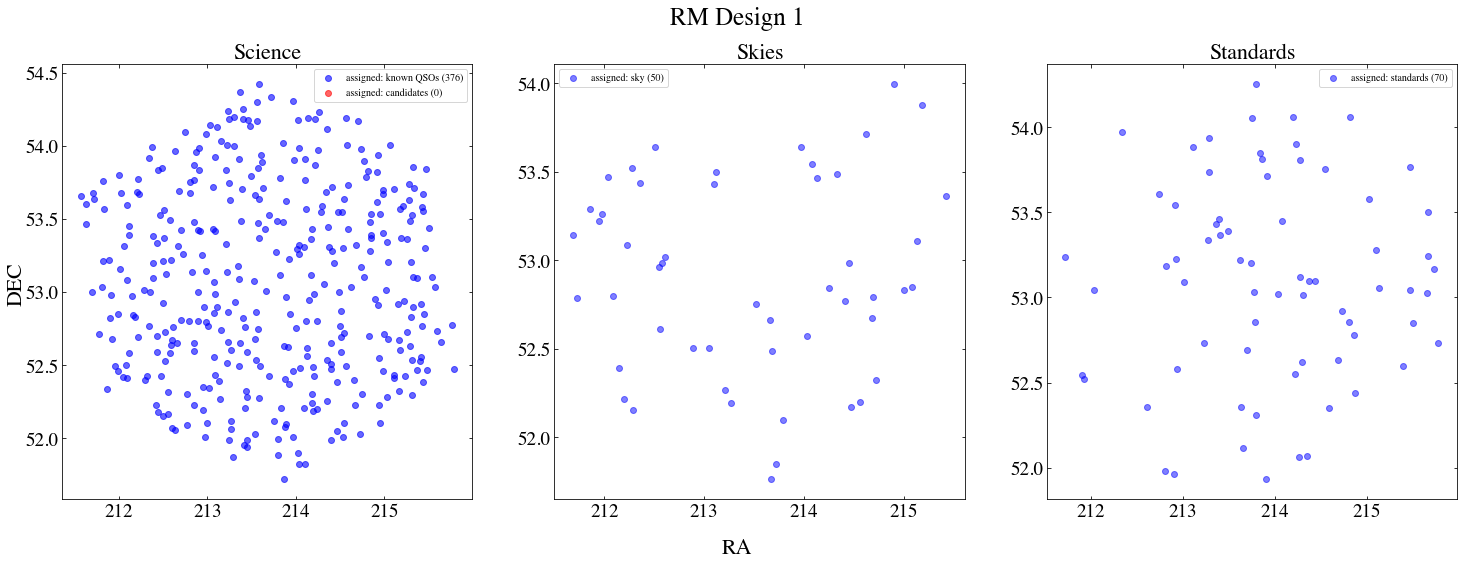

In [3]:
#design plotting
size =20
i=r'RM_design1.fits'
data2 = Table.read(i, hdu = 2, format='fits')
data1 = Table.read(i, hdu = 1, format='fits')

assigned_SCIENCEfibers = ((data2['assigned'] == 1) & (data1['category'] == 'science'))
assigned_CALIBfibers = ((data2['assigned'] == 1) & ((data1['category'] == 'sky_boss') | (data1['category'] == 'standard_boss')))
assigned_sky = ((data2['assigned'] == 1) & (data1['category'] == 'sky_boss'))
assigned_standards = ((data2['assigned'] == 1) & (data1['category'] == 'standard_boss'))

#Carton breakdown
assigned_known = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_known_spec'))
assigned_core = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_core'))
assigned_var = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_var'))
assigned_ancil = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_ancillary'))

##THRESHOLD BREAKDOWN###
assigned_QSOs =  ((data1['carton'][assigned_SCIENCEfibers] == 'bhm_rm_known_spec') | (data1['priority'][assigned_SCIENCEfibers] <= 950.))
print(len(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs])+len(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs]))
print(len(data1["ra"][assigned_SCIENCEfibers]))
#plt.figure(figsize=(10,10))
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

axs[0].scatter(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs], data1["dec"][assigned_SCIENCEfibers][assigned_QSOs],
            color = "blue", alpha = 0.6, 
            label="assigned: known QSOs ({})".format(len(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs])))
axs[0].scatter(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs], data1["dec"][assigned_SCIENCEfibers][~assigned_QSOs],
            color = "red", alpha = 0.6, 
            label="assigned: candidates ({})".format(len(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs])))

axs[1].scatter(data1["ra"][assigned_sky], data1["dec"][assigned_sky],
            color = "blue", alpha = 0.5, 
            label="assigned: sky ({})".format(len(data1["ra"][assigned_sky])))
axs[2].scatter(data1["ra"][assigned_standards], data1["dec"][assigned_standards],
            color = "blue", alpha = 0.5, 
            label="assigned: standards ({})".format(len(data1["ra"][assigned_standards])))
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title("Science", fontsize=size+2)
axs[1].set_title("Skies", fontsize=size+2)
axs[2].set_title("Standards", fontsize=size+2)

#axs.set_xlabel('RA', fontsize=size)
#axs.set_ylabel('Dec', fontsize=size)
plt.suptitle("RM Design {}".format(i.split("design")[1].split(".fits")[0]), fontsize=size+5)
axs[0].tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[0].tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[1].tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[1].tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[2].tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[2].tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
# Set common labels
fig.text(0.5, 0.04, 'RA', ha='center', va='center', fontsize=size+2)
fig.text(0.1, 0.5, 'DEC', ha='center', va='center', rotation='vertical', fontsize=size+2)

plt.savefig("RMdesign{}_layout.png".format(i.split("design")[1].split(".fits")[0]), facecolor='white',bbox_inches ='tight',dpi=300)

plt.show()

In [3]:
#plot the XMMLSS targets on the field
from astropy.table import Table
import numpy as np


#import the cartons
#read in data file
#SAVE COLUMNS TO NUMPY ARRAYS
cartdata = Table.read("./BHM_cartons_RM_v0.5.fits", format='fits')

#the arrays, the only ones we really care about are catid and priority
catalogid = np.array(cartdata["catalogid"], dtype=np.int64)
ra = np.array(cartdata["ra"])
dec = np.array(cartdata["dec"])
target_pk = np.array(cartdata["target_pk"], dtype=np.int64)
priority = np.array(cartdata["priority"])
value = np.array(cartdata["value"])
carton = np.array(cartdata["carton"],dtype=str )
instrument = np.array(cartdata["instrument"], dtype='<U10')
carton_to_target_pk = np.array(cartdata['carton_to_target_pk'])
g = np.array(cartdata['g'])
r = np.array(cartdata['r'])
i = np.array(cartdata['i'])
bp = np.array(cartdata['bp'])
gaia_g = np.array(cartdata['gaia_g'])
rp = np.array(cartdata['rp'])
h = np.array(cartdata['h'])
len(carton)

2332

In [4]:
#quick science mask
science_targs = ((carton=='bhm_rm_core')|((carton=='bhm_rm_var'))|((carton=='bhm_rm_ancil'))|(carton=='bhm_rm_known_spec'))
len(ra[science_targs])

1025

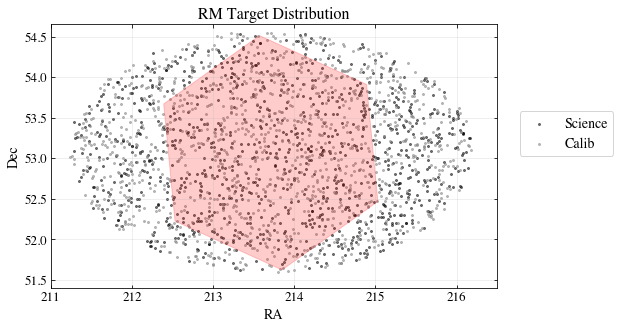

In [23]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection


size=14
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.grid(alpha=0.25, zorder=0)
axs.scatter(ra[science_targs], dec[science_targs],s=4, alpha=0.5, color='black', label='Science')
axs.scatter(ra[~science_targs], dec[~science_targs],s=4, alpha=0.5, color='grey', label='Calib')

patches = []

polygon = RegularPolygon((213.7041666,53.075), 6, radius=1.45, orientation=np.radians(5.5),label='FPS hex')
patches.append(polygon)

p = PatchCollection(patches, color='red', alpha=0.2)

axs.add_collection(p)
axs.set_aspect('equal', 'box')
axs.set_xlim(211,216.5)
axs.set_ylim(51.4,54.65)


axs.legend(loc=(1.05,0.5), prop={"size":size})
axs.set_xlabel('RA', fontsize=size)
axs.set_ylabel('Dec', fontsize=size)
axs.set_title("RM Target Distribution", fontsize=size+2)
axs.tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs.tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
plt.savefig("./RM_targdist.png", dpi=300, bbox_inches='tight',facecolor="white")